<a href="https://colab.research.google.com/github/Rafael07/study-exercises/blob/main/house_rent_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libs

In [301]:
#importing
import pandas as pd
import seaborn as sns

##Load database

In [302]:
house_rent_df = pd.read_excel('/content/drive/MyDrive/Projetos DNC/Cases aulas/Analise de Dados/houses_rent.xlsx')

In [297]:
#checking the dataframe
house_rent_df.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


##Data cleaning



In [303]:
#replacing empty spaces with underscore
house_rent_df.columns = house_rent_df.columns.str.replace(' ', '_')

In [304]:
#verify the changes
house_rent_df.columns

Index(['index', 'city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent_amount', 'property_tax',
       'fire_insurance', 'total'],
      dtype='object')

In [276]:
#checkinf if types are correct
house_rent_df.dtypes

index              int64
city              object
area               int64
rooms              int64
bathroom           int64
parking_spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent_amount        int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object

In [305]:
#correcting the types for more suitable ones
house_rent_df = house_rent_df.astype({'rent_amount': "float", "property_tax": 'float', "fire_insurance": "float", 'total': "float"})

In [278]:
#checking the changes
house_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


##Exploratory data analysis

In [307]:
#using query method for filtering data
house_rent_df = house_rent_df.query("(total <= 4000 and animal == 'accept') and (rooms == 2 or rooms == 3)")
house_rent_df.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [308]:
#using aggregate method to see the average cost by city
agg_city_price = house_rent_df.groupby(['city'])['total'].agg('mean').reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


In [309]:
#checking the facilities and total cost
agg_bath_room_price = house_rent_df.groupby(['bathroom', 'rooms'])['total'].agg('mean').reset_index()
agg_bath_room_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


In [310]:
#filtering for more important result by the are
agg_area = house_rent_df[house_rent_df['area'] <= 100]
agg_area['area']

1        64
3        73
7        55
8        82
15       56
       ... 
6056    100
6058     72
6059     59
6075     50
6079     60
Name: area, Length: 1064, dtype: int64

In [311]:
agg_area['area'].describe()

count    1064.000000
mean       69.641917
std        15.962461
min        30.000000
25%        57.000000
50%        69.000000
75%        80.000000
max       100.000000
Name: area, dtype: float64

##Visualization

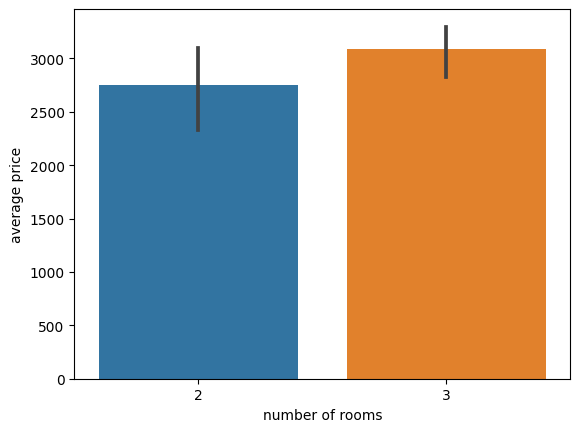

In [312]:
#number of rooms by price
ax = sns.barplot(data= agg_bath_room_price, x='rooms', y='total');
ax.set(xlabel = 'number of rooms', ylabel = 'average price');

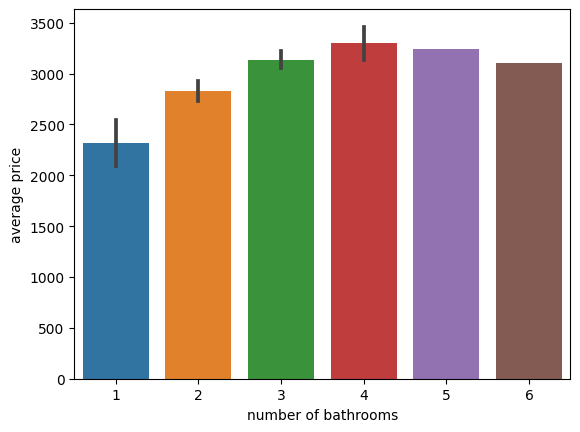

In [313]:
#number of bathrooms by price
ax = sns.barplot(data= agg_bath_room_price, x='bathroom', y='total');
ax.set(xlabel = 'number of bathrooms', ylabel = 'average price');

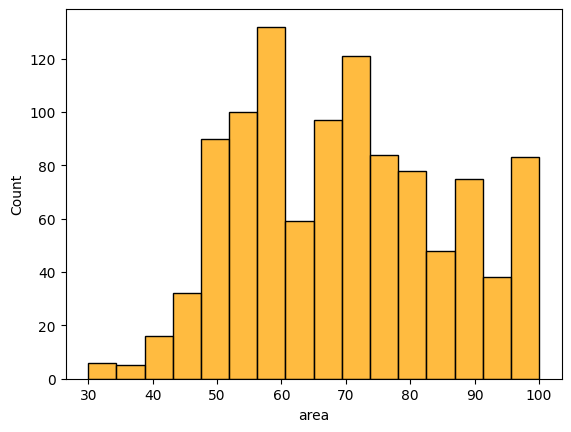

In [314]:
#area by number of properties
sns.histplot(data = agg_area, x='area', color='orange');

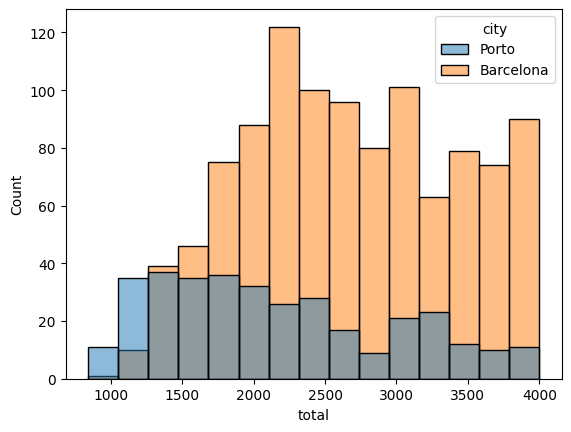

In [315]:
#cheking the cost of the cities
sns.histplot(data= house_rent_df, x='total', hue='city');

In [316]:
#choosing the cheaper city to live
house_rent_df = house_rent_df.query("city == 'Porto'")
house_rent_df.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


In [317]:
house_rent_df.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,2984.862974,128.889213,2.481050,1.597668,1.381924,1568.731778,91.655977,21.166181,2161.947522
std,1765.093849,684.179001,0.500371,0.701873,1.063713,687.146046,81.422431,10.449199,803.341044
min,1.000000,40.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1433.500000,60.000000,2.000000,1.000000,1.000000,1060.500000,39.500000,13.000000,1494.000000
50%,3052.000000,76.000000,2.000000,1.000000,1.000000,1350.000000,75.000000,18.000000,2017.000000
75%,4522.000000,101.500000,3.000000,2.000000,2.000000,2000.000000,120.500000,26.000000,2738.500000
max,6055.000000,12732.000000,3.000000,4.000000,8.000000,3500.000000,600.000000,53.000000,3994.000000


In [318]:
#number of apartments by floor
house_rent_df.groupby('floor').index.nunique().sort_values(ascending=False)

floor
-     77
1     52
3     51
2     31
4     26
7     20
5     16
6     13
11    11
9      9
8      7
10     6
12     6
15     5
13     4
17     3
16     2
14     1
18     1
19     1
51     1
Name: index, dtype: int64

In [319]:
#checking average property prices by floor
agg_floor_price = house_rent_df.groupby('floor')['total'].agg('mean').reset_index()
agg_floor_price

,floor,total
0,1,2004.096154
1,2,1745.322581
2,3,1709.921569
3,4,1872.923077
4,5,2385.812500
5,6,2331.307692
6,7,2340.750000
7,8,2744.714286
8,9,2941.111111
9,10,1946.666667


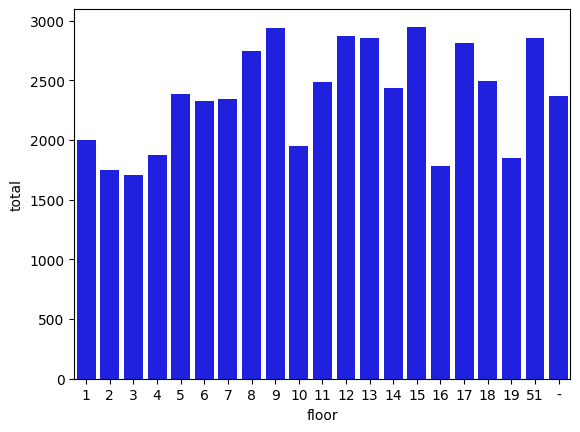

In [320]:
sns.barplot(data= agg_floor_price, x='floor', y='total', color='blue');

In [321]:
#filtering the options looking the highest property with lower cost
sixteenth_floor = house_rent_df.query("floor == 16")
sixteenth_floor.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0


#**Results:**
The chosen property was the 1843, because it attends all requirements of the customer, such as the 5175 property, but the last one is smaller and \$500 more
expensive.
So, with 100m² area, 2 rooms, pet friendly at the 16º floor at the impressive low cost of \$1523, the property 1843 at Porto was easily the most appropriate and was recommended, saving $2477 for the customer. Certain deal!!!